In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import boxcox
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, SelectKBest
from sklearn.feature_selection import SequentialFeatureSelector, RFE

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, f1_score, roc_auc_score

import joblib

In [114]:
df = pd.read_csv("sonar.all-data.csv")

df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [115]:
df['R'].unique()

array(['R', 'M'], dtype=object)

In [116]:
df['R'] = df['R'].map({'R':1, "M":0})

In [117]:
df.shape

(207, 61)

In [118]:
df.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523,0.463768
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038,0.499894
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100,0.000000
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300,0.000000
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [120]:
X = df.drop(columns=["R"], axis=1)
Y = df["R"]

In [121]:
def plotHist():
    plt.figure(figsize=(15,10))

    ind = 1

    for col in X.columns:
        plt.subplot(10,10,ind)
        sns.histplot(X[col], kde=True)
        ind+=1
    
    plt.show()

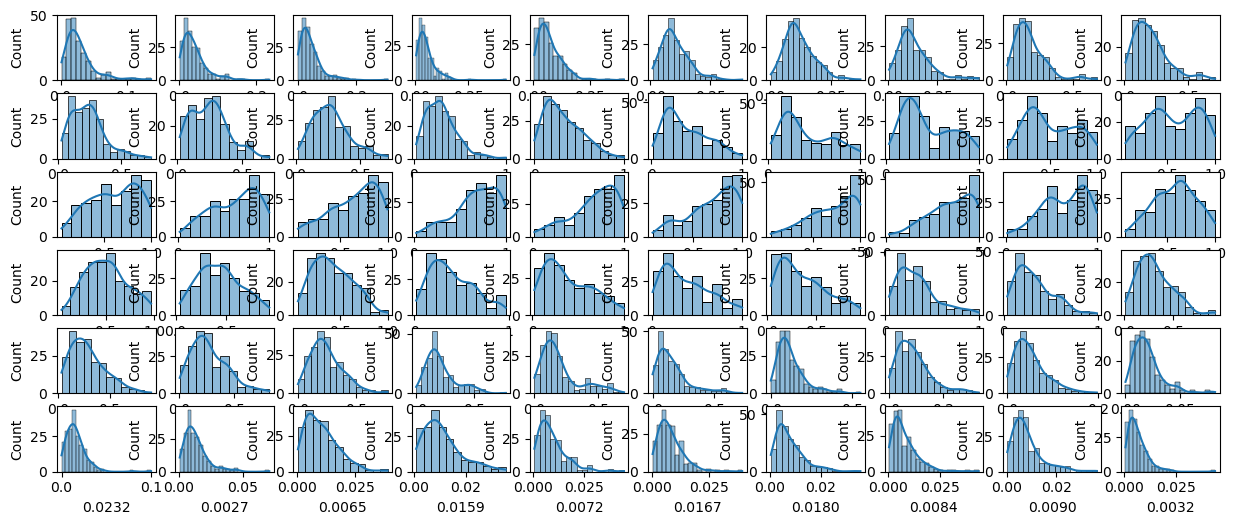

In [122]:
plotHist()

In [123]:
for col in X.columns:
    X[col], _ = boxcox(X[col]+1)

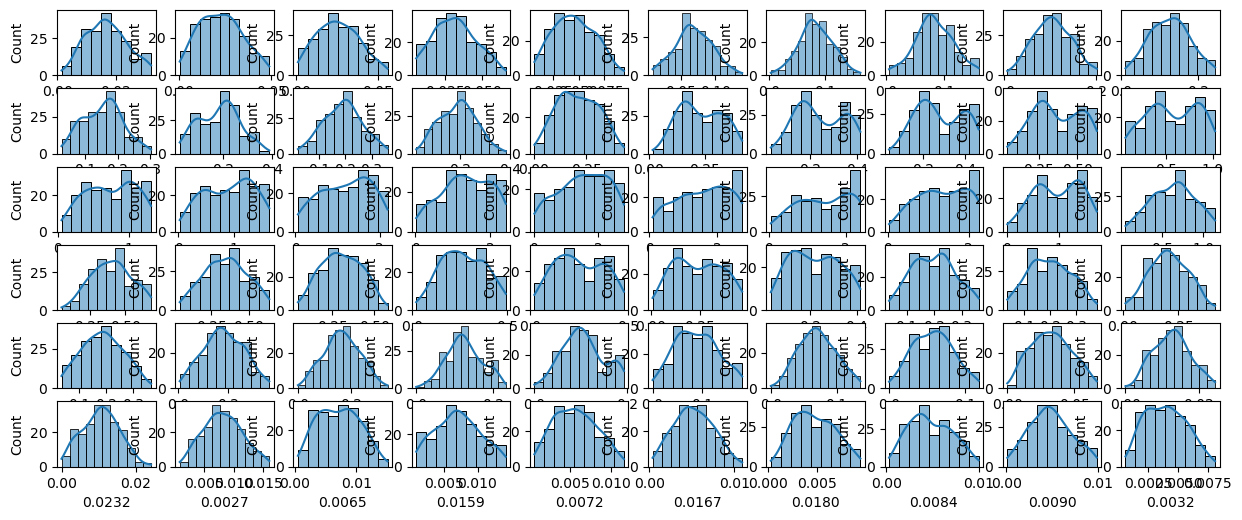

In [124]:
plotHist()

In [125]:
X.shape

(207, 60)

In [126]:
threshold = VarianceThreshold(threshold=0.0)
x_new = threshold.fit_transform(X)

# To get the remaining column names
remaining_columns = X.columns[threshold.get_support(indices=True)]

df_threshold = pd.DataFrame(x_new, columns=remaining_columns)

df_threshold.shape

(207, 60)

In [127]:
corr_matrix = df_threshold.corr().abs()

threshold_columns = set()

threshold = 0.95

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if(corr_matrix.iloc[i,j] > threshold):
      threshold.add(corr_matrix.columns[i])

# print("ThresholdColumnsare", threshold_columns)

df_correlated = df_threshold.drop(columns=list(threshold_columns))

df_correlated.shape

(207, 60)

In [128]:
mi_scores = mutual_info_classif(df_correlated, Y, discrete_features="auto")
mi_df = pd.DataFrame({"Features":X.columns, 'Mi Score':mi_scores})
mi_df = mi_df.sort_values(by='Mi Score', ascending=False)

print(mi_df)

   Features  Mi Score
11   0.1582  0.138747
10   0.1609  0.123605
48   0.0383  0.116271
47   0.1343  0.095987
9    0.2111  0.089440
8    0.3109  0.084364
7    0.1601  0.075350
36   0.6692  0.068671
45   0.1386  0.057593
20   0.5783  0.057283
38   0.4943  0.053851
19   0.4797  0.052831
24   0.6711  0.051303
35   0.8507  0.047716
57   0.0084  0.047534
22   0.4328  0.046347
14   0.0660  0.044392
16   0.3100  0.042675
58   0.0090  0.040431
15   0.2273  0.039123
42   0.2825  0.036840
46   0.1051  0.035715
21   0.5071  0.034250
4    0.0954  0.034091
28   0.6791  0.031752
59   0.0032  0.029974
37   0.6097  0.029700
6    0.1539  0.029122
32   0.5121  0.028319
12   0.2238  0.027500
51   0.0027  0.026182
39   0.2744  0.025872
29   0.3857  0.024964
0    0.0200  0.024067
43   0.4256  0.023766
44   0.2641  0.022735
54   0.0072  0.021563
2    0.0428  0.015713
23   0.5550  0.011513
3    0.0207  0.007848
31   0.2604  0.005257
49   0.0324  0.004303
30   0.1307  0.001763
56   0.0180  0.000000
55   0.016

In [129]:

selector = SelectKBest(mutual_info_classif, k=50)
X_mutualInfo = selector.fit_transform(df_correlated, Y)

selected_columns = df_correlated.columns[selector.get_support()]

# Optional: convert back to DataFrame
X_mutualInfo_df = pd.DataFrame(X_mutualInfo, columns=selected_columns)

In [130]:
model1 = LogisticRegression()

f_sfs = SequentialFeatureSelector(estimator=model1, n_features_to_select=48, direction="forward")

sfs_transformed = f_sfs.fit_transform(X_mutualInfo,Y)

selected_feature = X_mutualInfo_df.columns[f_sfs.get_support()]

# Get selected feature names
print("Selected features:", selected_feature.tolist())

f_sfs_df =  pd.DataFrame(sfs_transformed, columns=selected_feature)



Selected features: ['0.0200', '0.0428', '0.0207', '0.0954', '0.1539', '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0660', '0.2273', '0.3100', '0.4797', '0.5783', '0.5071', '0.5550', '0.6711', '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.2834', '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383', '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167', '0.0180', '0.0084', '0.0090', '0.0032']


In [131]:
mode12 = LogisticRegression()

rfs = RFE(estimator=mode12, n_features_to_select=45)

rfs_data = rfs.fit_transform(f_sfs_df, Y)

rfs_columns = f_sfs_df.columns[rfs.get_support()]

rfs_df =  pd.DataFrame(rfs_data, columns=rfs_columns)

In [132]:
rfs_df.shape

(207, 45)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(rfs_df, Y, test_size=0.3, random_state=43)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((144, 45), (63, 45), (144,), (63,))

In [134]:
models = {
    "RandomForestClassifier" : RandomForestClassifier(),
    "AdaBoostClassifier" : AdaBoostClassifier(),
    "BaggingClassifier" : BaggingClassifier()}

In [135]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc}")

RandomForestClassifier Accuracy: 0.8412698412698413
AdaBoostClassifier Accuracy: 0.8253968253968254
BaggingClassifier Accuracy: 0.7142857142857143


c:\Users\sande\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [136]:
# Define models and their parameter grids
models_and_params = {
    "RandomForestClassifier": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "AdaBoostClassifier": {
        "model": AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.5, 1.0]
        }
    },
    "BaggingClassifier": {
        "model": BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42),
        "params": {
            "n_estimators": [10, 50],
            "max_samples": [0.5, 1.0],
            "max_features": [0.5, 1.0]
        }
    }
}


# Loop through and apply GridSearchCV
best_models = {}

for name, mp in models_and_params.items():
    print(f"Training {name}...")
    grid = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    y_pred = grid.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Accuracy: {acc:.4f}\n")

Training RandomForestClassifier...
RandomForestClassifier Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier Accuracy: 0.8095

Training AdaBoostClassifier...
AdaBoostClassifier Best Params: {'learning_rate': 0.5, 'n_estimators': 50}
AdaBoostClassifier Accuracy: 0.6984

Training BaggingClassifier...


c:\Users\sande\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BaggingClassifier Best Params: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10}
BaggingClassifier Accuracy: 0.7937



In [137]:
models = {
    "RandomForestClassifier" : RandomForestClassifier( min_samples_split=5, n_estimators=50),
    "AdaBoostClassifier" : AdaBoostClassifier(learning_rate=0.5, n_estimators=50),
    "BaggingClassifier" : BaggingClassifier(max_features=1.0, max_samples=1.0, n_estimators=10)}

In [143]:
best_score = 0
best_model = None
best_model_name = ""

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print("For the Model =>", name)
    print("Accuracy", accuracy_score(y_test, preds))
    print("Precision", precision_score(y_test, preds))
    print("Recall", recall_score(y_test, preds))
    print("F1Score", f1_score(y_test, preds))
    
    if acc > best_score:
        best_score = acc
        best_model = model
        best_model_name = name

# Save the best model
if best_model:
    joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
    print(f"\n✅ Best Model '{best_model_name}' saved with accuracy: {best_score:.4f}")

For the Model => RandomForestClassifier
Accuracy 0.8253968253968254
Precision 0.9259259259259259
Recall 0.7352941176470589
F1Score 0.819672131147541
For the Model => AdaBoostClassifier
Accuracy 0.7619047619047619
Precision 0.88
Recall 0.6470588235294118
F1Score 0.7457627118644068
For the Model => BaggingClassifier
Accuracy 0.7142857142857143
Precision 0.8076923076923077
Recall 0.6176470588235294
F1Score 0.7


c:\Users\sande\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



✅ Best Model 'RandomForestClassifier' saved with accuracy: 0.6349


In [140]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name} Accuracy: {acc}")

RandomForestClassifier Accuracy: 0.7936507936507936


c:\Users\sande\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier Accuracy: 0.7619047619047619
BaggingClassifier Accuracy: 0.6349206349206349
